In [1]:
import numpy as np
import xarray as xr
import cftime
import matplotlib as mpl
import matplotlib.pyplot as plt



# put the PDF computing function here
# put lat-lon specs
# make lon-wise pdf for 585,246,g6solar and sulfur
# make a ridge plot

# -------
# 585    |
#        | here the gausiian will be red and towards right
# -------
# -------
# 245    |
#        | here the gasian will be slightly red
# -------
# -------
# G6sul  |
#        | here the gasian will same as 245 . On the RHS panels plot diff G6-245 and G6-585
# -------
# -------
# G6sol  |
#        | here the gasian will same as 245 . On the RHS panels plot diff G6-245 and G6-585
# -------


# Put the whole above on left for first 30 and then on right last 30

In [2]:
import xarray as xr
from pathlib import Path
import myfunctions as mf

In [3]:
# =========================
# User-defined metadata
# =========================

varname = "tas"

# =========================
# Base CEDA paths
# =========================

CEDA_BASE = Path("/badc/cmip6/data/CMIP6")

In [4]:
#Model Names
MODELS = {
    "UKESM1-0-LL":  {"institution": "MOHC",         "ensemble": "r1i1p1f2",  "grid": "gn",},
    "CNRM-ESM2-1":  {"institution": "CNRM-CERFACS", "ensemble": "r1i1p1f2",  "grid": "gr",},
    "MPI-ESM1-2-LR":{"institution": "MPI-M",        "ensemble": "r1i1p1f1",  "grid": "gn",},
    "CESM2-WACCM":  {"institution": "NCAR",         "ensemble": "r1i1p1f1",  "grid": "gn",},
    "IPSL-CM6A-LR": {"institution": "IPSL",         "ensemble": "r1i1p1f1",  "grid": "gr",},
}


In [5]:
#Experiment details
EXPERIMENTS = {
    # "HIST":     {"project": "CMIP",        "scenario": "historical", "color": "black"},
    "SSP245":   {"project": "ScenarioMIP", "scenario": "ssp245"},
    "SSP585":   {"project": "ScenarioMIP", "scenario": "ssp585"},
    "G6solar":  {"project": "GeoMIP",      "scenario": "G6solar"},
    "G6sulfur": {"project": "GeoMIP",      "scenario": "G6sulfur"},
}

In [6]:
counts_all = {}

for model_name, model_meta in MODELS.items():

    counts_all[model_name] = {}

    for exp, meta in EXPERIMENTS.items():

        if model_name == "CESM2-WACCM":
            ensemble = "r1i1p1f2" if meta["scenario"] == "G6sulfur" else "r1i1p1f1"
        else:
            ensemble = model_meta["ensemble"]

        base = (
            CEDA_BASE
            / meta["project"]
            / model_meta["institution"]
            / model_name
            / meta["scenario"]
            / ensemble
            / "day"
            / varname
            / model_meta["grid"]
            / "latest"
        )

        print(f"Reading {model_name} {exp} {base}")
        ds = mf.open_files(str(base))
        da = mf.read_var(ds, varname)

        # --- PROCESS INSIDE EXP LOOP ---
        
        if model_name == "CESM2-WACCM":
            da = da.sel(
                time=slice(
                    cftime.DatetimeNoLeap(2071, 1, 1),
                    cftime.DatetimeNoLeap(2100, 12, 30)   # or the last date in your dataset
                )
            )
            da=da.load()
        else:
            da = da.sel(time=slice("2071-01-01", "2100-12")).load()

        # da = da.resample(time="1D").mean()   # remove *86400 for tas

        da_tropics = da.sel(lat=slice(-15, 15))

        values = da_tropics.values.flatten() - 273.0 
        values = values[np.isfinite(values)]

        bin_edges_ref = np.arange(10, 40, 1)

        counts, edges = np.histogram(values, bins=bin_edges_ref)
        percent = 100 * counts / counts.sum()

        # --- STORE ---
        counts_all[model_name][exp] = {
            "counts": counts,
            "percent": percent,
            "bin_edges": bin_edges_ref,
        }

Reading UKESM1-0-LL SSP245 /badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp245/r1i1p1f2/day/tas/gn/latest
Reading UKESM1-0-LL SSP585 /badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp585/r1i1p1f2/day/tas/gn/latest
Reading UKESM1-0-LL G6solar /badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G6solar/r1i1p1f2/day/tas/gn/latest
Reading UKESM1-0-LL G6sulfur /badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G6sulfur/r1i1p1f2/day/tas/gn/latest
Reading CNRM-ESM2-1 SSP245 /badc/cmip6/data/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM-ESM2-1/ssp245/r1i1p1f2/day/tas/gr/latest
Reading CNRM-ESM2-1 SSP585 /badc/cmip6/data/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM-ESM2-1/ssp585/r1i1p1f2/day/tas/gr/latest
Reading CNRM-ESM2-1 G6solar /badc/cmip6/data/CMIP6/GeoMIP/CNRM-CERFACS/CNRM-ESM2-1/G6solar/r1i1p1f2/day/tas/gr/latest
Reading CNRM-ESM2-1 G6sulfur /badc/cmip6/data/CMIP6/GeoMIP/CNRM-CERFACS/CNRM-ESM2-1/G6sulfur/r1i1p1f2/day/tas/gr/latest
Reading MPI-ESM1-2-LR SSP245 /badc/cmip6/data/CMIP6/ScenarioMIP/MPI-M/MP

/apps/jasmin/jaspy/miniforge_envs/jaspy3.12/mf3-25.3.0-3/envs/jaspy3.12-mf3-25.3.0-3-v20250704/lib/python3.12/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'tas' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/apps/jasmin/jaspy/miniforge_envs/jaspy3.12/mf3-25.3.0-3/envs/jaspy3.12-mf3-25.3.0-3-v20250704/lib/python3.12/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'tas' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/apps/jasmin/jaspy/miniforge_envs/jaspy3.12/mf3-25.3.0-3/envs/jaspy3.12-mf3-25.3.0-3-v20250704/lib/python3.12/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'tas' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/apps/jasmin/jaspy/min

Reading CESM2-WACCM SSP585 /badc/cmip6/data/CMIP6/ScenarioMIP/NCAR/CESM2-WACCM/ssp585/r1i1p1f1/day/tas/gn/latest


/apps/jasmin/jaspy/miniforge_envs/jaspy3.12/mf3-25.3.0-3/envs/jaspy3.12-mf3-25.3.0-3-v20250704/lib/python3.12/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'tas' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/apps/jasmin/jaspy/miniforge_envs/jaspy3.12/mf3-25.3.0-3/envs/jaspy3.12-mf3-25.3.0-3-v20250704/lib/python3.12/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'tas' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/apps/jasmin/jaspy/miniforge_envs/jaspy3.12/mf3-25.3.0-3/envs/jaspy3.12-mf3-25.3.0-3-v20250704/lib/python3.12/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'tas' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/apps/jasmin/jaspy/min

Reading CESM2-WACCM G6solar /badc/cmip6/data/CMIP6/GeoMIP/NCAR/CESM2-WACCM/G6solar/r1i1p1f1/day/tas/gn/latest


/apps/jasmin/jaspy/miniforge_envs/jaspy3.12/mf3-25.3.0-3/envs/jaspy3.12-mf3-25.3.0-3-v20250704/lib/python3.12/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'tas' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/apps/jasmin/jaspy/miniforge_envs/jaspy3.12/mf3-25.3.0-3/envs/jaspy3.12-mf3-25.3.0-3-v20250704/lib/python3.12/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'tas' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/apps/jasmin/jaspy/miniforge_envs/jaspy3.12/mf3-25.3.0-3/envs/jaspy3.12-mf3-25.3.0-3-v20250704/lib/python3.12/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'tas' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/apps/jasmin/jaspy/min

Reading CESM2-WACCM G6sulfur /badc/cmip6/data/CMIP6/GeoMIP/NCAR/CESM2-WACCM/G6sulfur/r1i1p1f2/day/tas/gn/latest


/apps/jasmin/jaspy/miniforge_envs/jaspy3.12/mf3-25.3.0-3/envs/jaspy3.12-mf3-25.3.0-3-v20250704/lib/python3.12/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'tas' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/apps/jasmin/jaspy/miniforge_envs/jaspy3.12/mf3-25.3.0-3/envs/jaspy3.12-mf3-25.3.0-3-v20250704/lib/python3.12/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'tas' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/apps/jasmin/jaspy/miniforge_envs/jaspy3.12/mf3-25.3.0-3/envs/jaspy3.12-mf3-25.3.0-3-v20250704/lib/python3.12/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'tas' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/apps/jasmin/jaspy/min

Reading IPSL-CM6A-LR SSP245 /badc/cmip6/data/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR/ssp245/r1i1p1f1/day/tas/gr/latest
Reading IPSL-CM6A-LR SSP585 /badc/cmip6/data/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR/ssp585/r1i1p1f1/day/tas/gr/latest
Reading IPSL-CM6A-LR G6solar /badc/cmip6/data/CMIP6/GeoMIP/IPSL/IPSL-CM6A-LR/G6solar/r1i1p1f1/day/tas/gr/latest
Reading IPSL-CM6A-LR G6sulfur /badc/cmip6/data/CMIP6/GeoMIP/IPSL/IPSL-CM6A-LR/G6sulfur/r1i1p1f1/day/tas/gr/latest


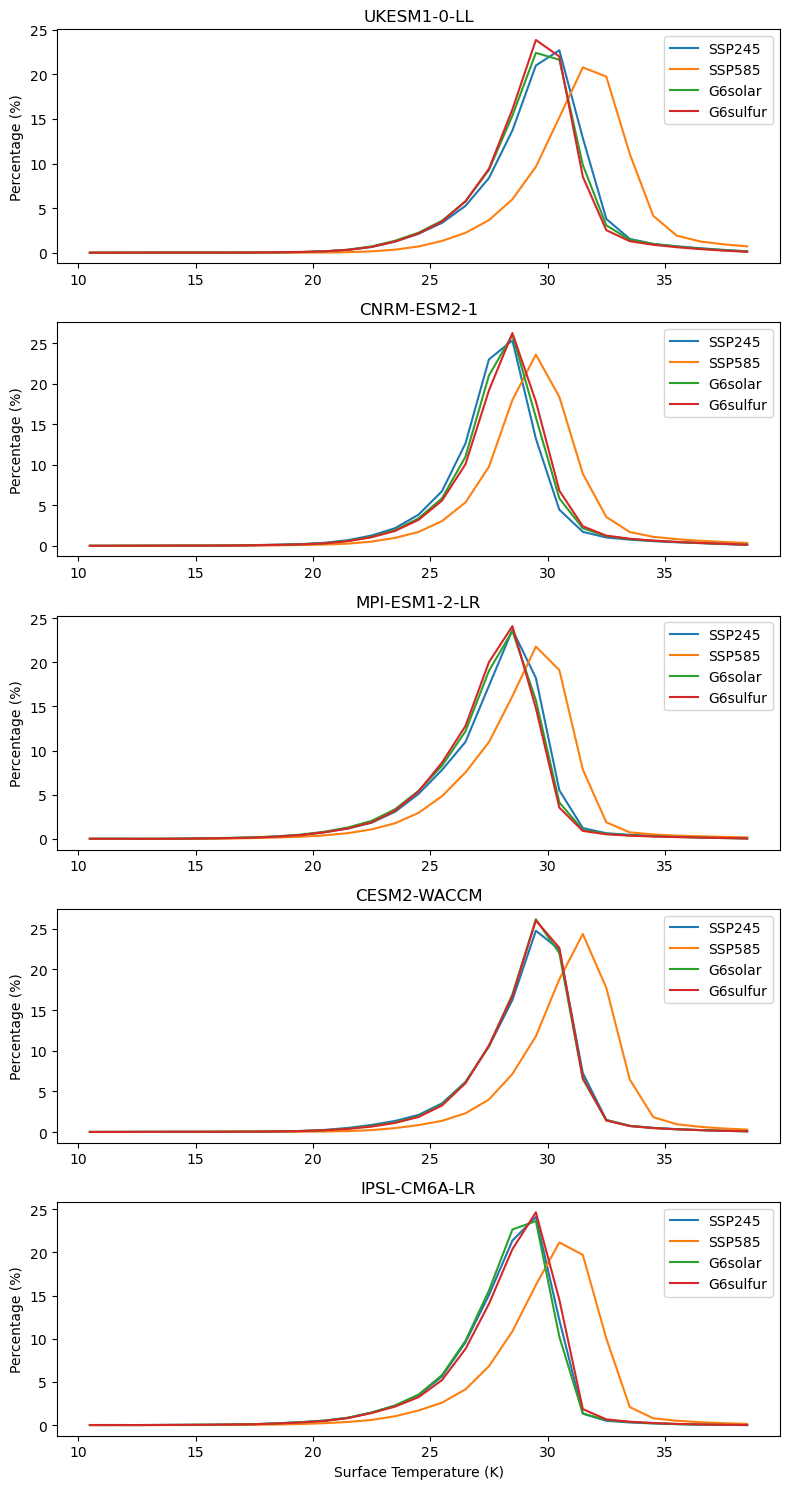

In [7]:
fig, axes = plt.subplots(
    nrows=len(counts_all),
    ncols=1,
    figsize=(8, 3 * len(counts_all)),
)

axes = np.atleast_1d(axes)

for row, model in enumerate(counts_all):

    for exp in counts_all[model]:

        percent = counts_all[model][exp]["percent"]
        edges = counts_all[model][exp]["bin_edges"]
        centers = 0.5 * (edges[:-1] + edges[1:])

        axes[row].plot(centers, percent, label=exp)

    axes[row].set_title(model)
    axes[-1].set_xlabel("Surface Temperature (K)")
    axes[row].set_ylabel("Percentage (%)")
    axes[row].legend()

plt.tight_layout()
#Saving figure
fig_directory='/home/users/bidyut/UoE/20260112_Basic_Analysis'
figname="Figure_PDF_T_2071-2100"

# plt.savefig(''+str(fig_directory)+'/'+str(figname)+'.svg', format="svg",transparent=True, dpi=1200)
# !rsvg-convert -f pdf -o {fig_directory}/{figname}.pdf {fig_directory}/{figname}.svg

plt.savefig(''+str(fig_directory)+'/'+str(figname)+'.pdf', format="pdf")

plt.show()

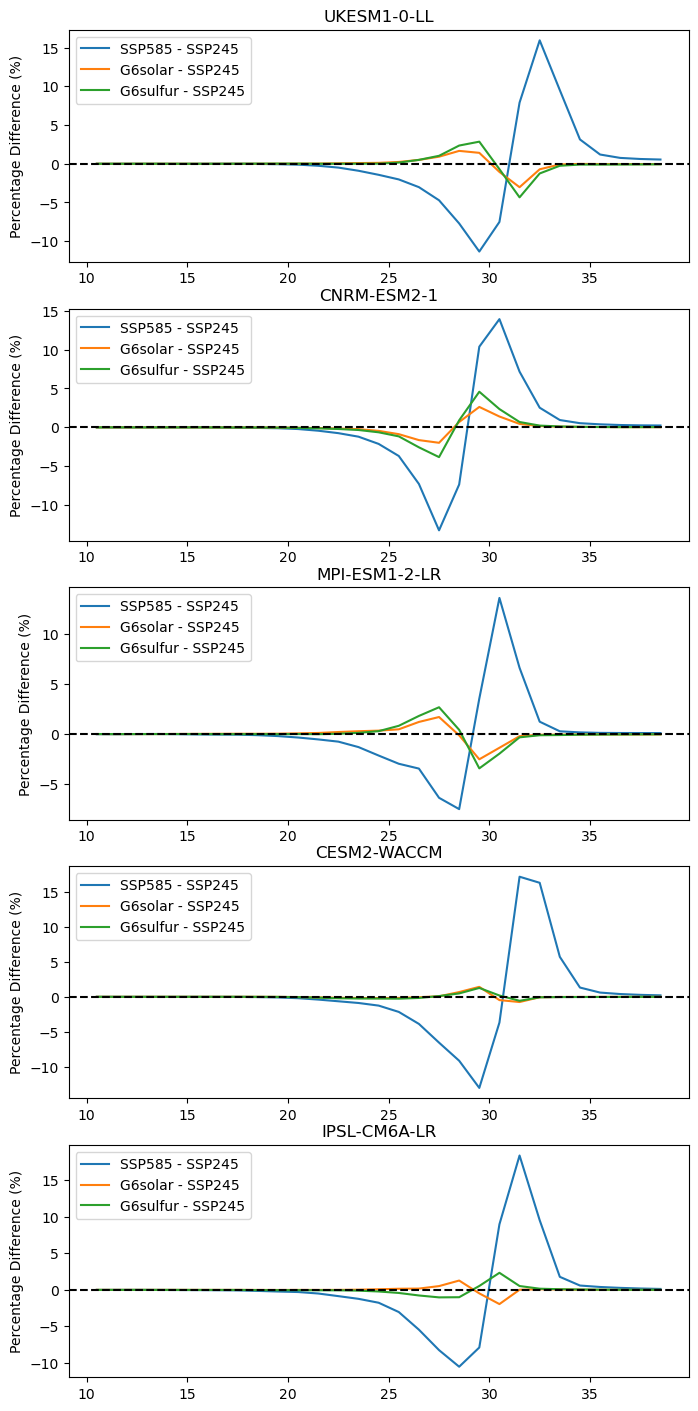

In [9]:
fig, axes = plt.subplots(
    nrows=len(counts_all),
    ncols=1,
    figsize=(8, 3.5 * len(counts_all)),
)

axes = np.atleast_1d(axes)

for row, model in enumerate(counts_all):
    ref = counts_all[model]["SSP245"]["percent"]  # reference

    for exp in counts_all[model]:
        if exp == "SSP245":
            continue
        percent = counts_all[model][exp]["percent"]
        edges = counts_all[model][exp]["bin_edges"]
        centers = 0.5 * (edges[:-1] + edges[1:])

        # axes[row].plot(centers, percent - ref, label=f"{exp} - SSP245")
        # axes[row].set_ylim(-2,2)
        axes[row].plot(centers, percent - ref, label=f"{exp} - SSP245")
        # axes[row].set_yscale("symlog", linthresh=0.1)  # linthresh controls linear region around 0

    axes[row].axhline(0, color="k", linestyle="--")  # zero line for reference
    axes[row].set_title(model)
    # axes[row].set_xlabel("Surface Temperature (K)")
    axes[row].set_ylabel("Percentage Difference (%)")
    axes[row].legend()

#Saving figure
fig_directory='/home/users/bidyut/UoE/20260112_Basic_Analysis'
figname="Figure_PDF_T_2071-2100_II"

# plt.savefig(''+str(fig_directory)+'/'+str(figname)+'.svg', format="svg",transparent=True, dpi=1200)
# !rsvg-convert -f pdf -o {fig_directory}/{figname}.pdf {fig_directory}/{figname}.svg

plt.savefig(''+str(fig_directory)+'/'+str(figname)+'.pdf', format="pdf")

plt.show()